In [130]:
import pandas as pd
from tqdm.auto import tqdm

In [3]:
import nltk

In [79]:
df = pd.read_csv("../data/processed/chequeado_processed.csv", index_col=0)
translated_afirmacao = pd.read_csv("../data/interim/Afirmação_checada_full_translation.csv", index_col=0)
translated_descricao = pd.read_csv("../data/interim/Descrição_full_translation.csv", index_col=0)


In [80]:
final = (
    df
    .join(translated_afirmacao)
    .join(translated_descricao)
)

In [81]:
final.loc[final['Afirmação checada_full_translation'].str.contains('quot'), ['Afirmação checada_full_translation', 'Afirmação checada']]

Afirmação checada_full_translation  \
3     Argentine President, Alberto Fernández: &quot;...   
11    Christine Agarde said: &quot;The elderly live ...   
12    Putin said: &quot;Powerful people in the world...   
23    Malbrán Institute workers warn people to stay ...   
32    &quot;Social distance&quot;: what is and what ...   
...                                                 ...   
3640  Exposure to sun, eggs and alkaline foods &quot...   
3647  João Doria said the following: I will not allo...   
3675  Photo of an alleged dose of Pfizer vaccine, wi...   
3702  Anvisa President says that vaccines currently ...   
3708  São Paulo government spent R $ 400 million to ...   

                                      Afirmação checada  
3     Presidente da Argentina, Alberto Fernández: “A...  
11    Christine Agarde disse: “Os idosos vivem muito...  
12    Putin disse: “Poderosos do mundo, estou ciente...  
23    Trabalhadores do Instituto Malbrán advertem as...  
32    “Distanciamento social”: o que é e qual a dife...  
...                                                 ...  
3640  Exposição ao sol, ovos e comidas alcalinas" aj...  
3647  João Doria disse o seguinte: Não vou permitir ...  
3675  Foto de uma suposta dose da vacina da Pfizer, ...  
3702  Presidente da Anvisa diz que vacinas atualment...  
3708  Governo de São Paulo gastou R$ 400 milhões par...  

[350 rows x 2 columns]

In [82]:
from nltk.sentiment import SentimentIntensityAnalyzer, SentimentAnalyzer
sentiment_analyzer = SentimentAnalyzer()
sia = SentimentIntensityAnalyzer()


In [83]:
final.columns

Index(['País', 'Idioma', 'Afirmação checada', 'Classificação', 'Descrição',
       'Data de publicação', 'Organização', 'Link para a checagem',
       'Tipo de informação', 'Formato', 'Tipo de checagem',
       'Publicação checada', 'Data em que a desinformação foi detectada',
       'Origem', 'Fonte', 'Foi atualizado ou corrigido?',
       'Outros países onde circulou', 'Afirmação checada_full_translation',
       'Descrição_full_translation'],
      dtype='object')

In [84]:
(final
        .loc[:, ["Afirmação checada_full_translation", "Descrição_full_translation"]]
        .applymap(lambda x: sia.polarity_scores(x)['compound'])
        .rename(columns={
            "Afirmação checada_full_translation": "Afirmação_checada_en_sentiment",
            "Descrição_full_translation": "Descrição_en_sentiment",
        }))

Afirmação_checada_en_sentiment  Descrição_en_sentiment
0                             0.0000                  0.0000
1                             0.0000                  0.0000
2                             0.0000                  0.1531
3                            -0.3818                  0.0000
4                             0.0000                 -0.2960
...                              ...                     ...
3723                          0.3612                  0.1779
3724                          0.0000                  0.0000
3725                          0.0000                  0.0000
3726                          0.0000                  0.0000
3727                         -0.1280                 -0.6908

[3728 rows x 2 columns]

In [85]:
with_sentiment = pd.concat([
    final, 
    (final
        .loc[:, ["Afirmação checada_full_translation", "Descrição_full_translation"]]
        .applymap(lambda x: sia.polarity_scores(x)['compound'])
        .rename(columns={
            "Afirmação checada_full_translation": "Afirmação_checada_en_sentiment",
            "Descrição_full_translation": "Descrição_en_sentiment",
        })
    )],
    axis=1)

In [86]:
with_sentiment.head()

País    Idioma                                  Afirmação checada  \
0  Argentina  Espanhol  Confirmado um caso de Coronavírus em Santiago ...   
1  Argentina  Espanhol       Confirmado um caso de Coronavírus em Chaco.    
2  Argentina  Espanhol  Um médico argentino descobriu e está aplicando...   
3  Argentina  Espanhol  Presidente da Argentina, Alberto Fernández: “A...   
4  Argentina  Espanhol  O presidente de Argentina, Alberto Fernández, ...   

     Classificação                                          Descrição  \
0            Falso  O Ministério da Saúde da província afirmou que...   
1            Falso  O Ministério da Saúde da província afirmou que...   
2            Falso  A OMS informa que até o momento não existe uma...   
3            Falso  A OMS não emitiu nenhuma recomendação sobre o ...   
4  Não se sustenta  Ainda não existe consenso científico sobre o i...   

  Data de publicação Organização  \
0         27/02/2020   Chequeado   
1         27/02/2020   Chequeado   
2         27/02/2020   Chequeado   
3         12/03/2020   Chequeado   
4         12/03/2020   Chequeado   

                                Link para a checagem  \
0  https://chequeado.com/verificacionfb/no-no-se-...   
1  https://chequeado.com/verificacionfb/es-falso-...   
2  https://chequeado.com/verificacionfb/es-falso-...   
3  https://chequeado.com/ultimas-noticias/alberto...   
4  https://chequeado.com/ultimas-noticias/alberto...   

         Tipo de informação        Formato  ...  \
0       Situação de um país         Imagem  ...   
1       Situação de um país         Imagem  ...   
2                     Curas  Imagem, Texto  ...   
3                     Curas          Áudio  ...   
4  Características do vírus          Áudio  ...   

                                  Publicação checada  \
0  https://drive.google.com/file/d/18MViCcWRoVVVg...   
1  https://drive.google.com/file/d/1SJ2-A3WCr-vod...   
2  https://drive.google.com/file/d/1FYpMz5CN3ZyyS...   
3                                                NaN   
4                                                NaN   

  Data em que a desinformação foi detectada                   Origem  \
0                                26/02/2020                 Facebook   
1                                       NaN                 Facebook   
2                                       NaN  Redes sociais, Whatsapp   
3                                03/12/2020                   Outros   
4                                03/12/2020                   Outros   

                                          Fonte Foi atualizado ou corrigido?  \
0                                  Desconhecido                          NaN   
1                                  Desconhecido                          NaN   
2                                  Desconhecido                          NaN   
3  O presidente de Argentina, Alberto Fernández                          NaN   
4  O presidente de Argentina, Alberto Fernández                          NaN   

    Outros países onde circulou  \
0                           NaN   
1                           NaN   
2                       Espanha   
3  Espanha, Hong Kong, Colômbia   
4                        México   

                  Afirmação checada_full_translation  \
0  Coronavirus case confirmed in Santiago del Estero   
1          A case of Coronavirus in Chaco confirmed.   
2  An Argentine doctor discovered and is applying...   
3  Argentine President, Alberto Fernández: &quot;...   
4  Argentine President Alberto Fernandez said the...   

                          Descrição_full_translation  \
0  The provincial Ministry of Health said it was ...   
1  The provincial Ministry of Health said it was ...   
2  WHO reports that there is still no specific va...   
3  The WHO has not issued any recommendations on ...   
4  There is still no scientific consensus on the ...   

  Afirmação_checada_en_sentiment  Descrição_en_sentiment  
0                         0.0000                  

In [87]:
with_sentiment.columns


Index(['País', 'Idioma', 'Afirmação checada', 'Classificação', 'Descrição',
       'Data de publicação', 'Organização', 'Link para a checagem',
       'Tipo de informação', 'Formato', 'Tipo de checagem',
       'Publicação checada', 'Data em que a desinformação foi detectada',
       'Origem', 'Fonte', 'Foi atualizado ou corrigido?',
       'Outros países onde circulou', 'Afirmação checada_full_translation',
       'Descrição_full_translation', 'Afirmação_checada_en_sentiment',
       'Descrição_en_sentiment'],
      dtype='object')

In [99]:
sia.polarity_scores(with_sentiment['Afirmação checada_full_translation'].iloc[4])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

<ipython-input-90-ee2a6486f271>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  with_sentiment[[col for col in with_sentiment.columns if "sentiment" in col]].hist(ax=ax)
/Users/rahul/opt/miniconda3/envs/lost-in-translation/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Afirmação_checada_en_sentiment'}>,
        <AxesSubplot:title={'center':'Descrição_en_sentiment'}>]],
      dtype=object)

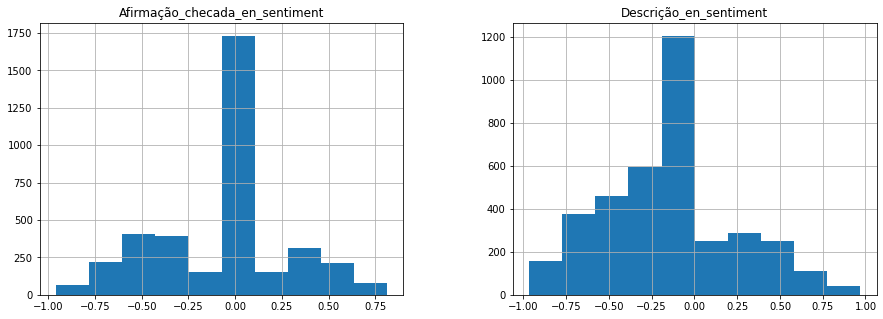

In [90]:
fig, ax = plt.subplots(figsize=(15,5))
with_sentiment[[col for col in with_sentiment.columns if "sentiment" in col]].hist(ax=ax)

In [112]:
with_sentiment.head()

País    Idioma                                  Afirmação checada  \
0  Argentina  Espanhol  Confirmado um caso de Coronavírus em Santiago ...   
1  Argentina  Espanhol       Confirmado um caso de Coronavírus em Chaco.    
2  Argentina  Espanhol  Um médico argentino descobriu e está aplicando...   
3  Argentina  Espanhol  Presidente da Argentina, Alberto Fernández: “A...   
4  Argentina  Espanhol  O presidente de Argentina, Alberto Fernández, ...   

     Classificação                                          Descrição  \
0            Falso  O Ministério da Saúde da província afirmou que...   
1            Falso  O Ministério da Saúde da província afirmou que...   
2            Falso  A OMS informa que até o momento não existe uma...   
3            Falso  A OMS não emitiu nenhuma recomendação sobre o ...   
4  Não se sustenta  Ainda não existe consenso científico sobre o i...   

  Data de publicação Organização  \
0         27/02/2020   Chequeado   
1         27/02/2020   Chequeado   
2         27/02/2020   Chequeado   
3         12/03/2020   Chequeado   
4         12/03/2020   Chequeado   

                                Link para a checagem  \
0  https://chequeado.com/verificacionfb/no-no-se-...   
1  https://chequeado.com/verificacionfb/es-falso-...   
2  https://chequeado.com/verificacionfb/es-falso-...   
3  https://chequeado.com/ultimas-noticias/alberto...   
4  https://chequeado.com/ultimas-noticias/alberto...   

         Tipo de informação        Formato  ...  \
0       Situação de um país         Imagem  ...   
1       Situação de um país         Imagem  ...   
2                     Curas  Imagem, Texto  ...   
3                     Curas          Áudio  ...   
4  Características do vírus          Áudio  ...   

                                  Publicação checada  \
0  https://drive.google.com/file/d/18MViCcWRoVVVg...   
1  https://drive.google.com/file/d/1SJ2-A3WCr-vod...   
2  https://drive.google.com/file/d/1FYpMz5CN3ZyyS...   
3                                                NaN   
4                                                NaN   

  Data em que a desinformação foi detectada                   Origem  \
0                                26/02/2020                 Facebook   
1                                       NaN                 Facebook   
2                                       NaN  Redes sociais, Whatsapp   
3                                03/12/2020                   Outros   
4                                03/12/2020                   Outros   

                                          Fonte Foi atualizado ou corrigido?  \
0                                  Desconhecido                          NaN   
1                                  Desconhecido                          NaN   
2                                  Desconhecido                          NaN   
3  O presidente de Argentina, Alberto Fernández                          NaN   
4  O presidente de Argentina, Alberto Fernández                          NaN   

    Outros países onde circulou  \
0                           NaN   
1                           NaN   
2                       Espanha   
3  Espanha, Hong Kong, Colômbia   
4                        México   

                  Afirmação checada_full_translation  \
0  Coronavirus case confirmed in Santiago del Estero   
1          A case of Coronavirus in Chaco confirmed.   
2  An Argentine doctor discovered and is applying...   
3  Argentine President, Alberto Fernández: &quot;...   
4  Argentine President Alberto Fernandez said the...   

                          Descrição_full_translation  \
0  The provincial Ministry of Health said it was ...   
1  The provincial Ministry of Health said it was ...   
2  WHO reports that there is still no specific va...   
3  The WHO has not issued any recommendations on ...   
4  There is still no scientific consensus on the ...   

  Afirmação_checada_en_sentiment  Descrição_en_sentiment  
0                         0.0000                  

In [103]:
with_sentiment["Tipo de informação"].value_counts()

Outros                             888
Curas                              607
Medidas                            386
Situação de um país                349
Prevenção                          277
                                  ... 
Medidas                              1
Situação do país, Contágios          1
Situação de um país, Contágios       1
Origem do vírus, Prevenção           1
Testes, Curas, Origem do vírus       1
Name: Tipo de informação, Length: 92, dtype: int64

<AxesSubplot:xlabel='Data de publicação'>

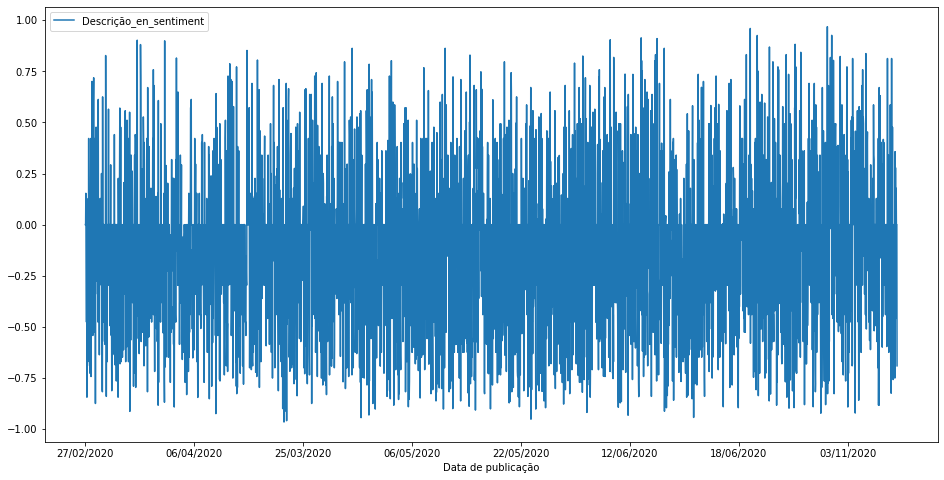

In [89]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
with_sentiment.set_index('Data de publicação')[['Descrição_en_sentiment']].plot(ax=ax)

In [139]:
import stanza
import numpy as np
nlp_en = stanza.Pipeline(lang='en', processors='tokenize,lemma')


2021-04-13 13:30:10 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| lemma     | combined |

2021-04-13 13:30:10 INFO: Use device: cpu
2021-04-13 13:30:10 INFO: Loading: tokenize
2021-04-13 13:30:10 INFO: Loading: lemma
2021-04-13 13:30:10 INFO: Done loading processors!


In [154]:
doc = nlp_en(with_sentiment['Afirmação checada_full_translation'].iloc[0])

In [165]:
def lemmatize(x):
    return ".".join(
        [
            " ".join([word.lemma for word in sentence.words])
            for sentence in nlp_en(x).sentences
        ]
    )

In [168]:
tqdm.pandas()
lemma_sent = (
    with_sentiment[['Afirmação checada_full_translation']]
    .progress_applymap(lemmatize)
    .progress_applymap(lambda x: sia.polarity_scores(x)['compound'])
    )

100%|██████████| 3728/3728 [00:00<00:00, 3852.53it/s]


Afirmação checada_full_translation
0                                 0.0000
1                                 0.0000
2                                 0.0000
3                                -0.4939
4                                -0.5994
...                                  ...
3723                              0.3612
3724                              0.0000
3725                              0.0000
3726                              0.0000
3727                             -0.2732

[3728 rows x 1 columns]

array([[<AxesSubplot:title={'center':'Afirmação checada_full_translation'}>]],
      dtype=object)

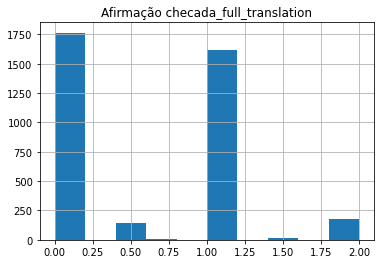

In [135]:
df.hist()